In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [8]:
data=pd.read_csv('insurance_data.csv')
data

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [10]:
x=data.drop('bought_insurance',axis=1)#feature
y=data['bought_insurance']#target

In [12]:
x

,age
0,22
1,25
2,47
3,52
4,46
5,56
6,55
7,60
8,62
9,61


In [14]:
y

0     0
1     0
2     1
3     0
4     1
5     1
6     0
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    1
15    1
16    1
17    1
18    0
19    0
20    0
21    0
22    1
23    1
24    1
25    1
26    0
Name: bought_insurance, dtype: int64

Text(0, 0.5, 'bought insurance')

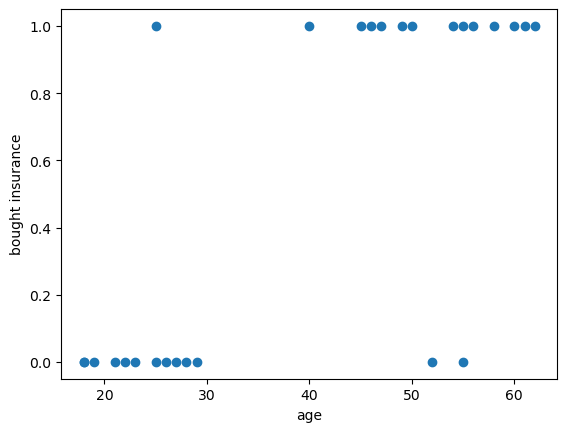

In [16]:
plt.scatter(x,y)
plt.xlabel('age')
plt.ylabel("bought insurance")

In [18]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=20)

In [20]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [22]:
model.coef_

array([[0.1050321]])

In [24]:
model.intercept_

array([-3.80057581])

In [26]:
y_pred=model.predict(X_test)

In [28]:
y_pred

array([0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [30]:
prediction_table=pd.DataFrame({'true y value':y_test,'predicted y value':y_pred})

In [32]:
prediction_table

,true y value,predicted y value
13,0,0
4,1,1
1,0,0
10,0,0
26,0,0
12,0,0
18,0,0


In [34]:
model.score(X_train,y_train)

0.85

In [36]:
model.score(X_test,y_test)

1.0

confusion matrix-to test performance of  our model

In [39]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

In [41]:
y_pred=model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[6, 0],
       [0, 1]], dtype=int64)

Text(50.722222222222214, 0.5, 'predicton')

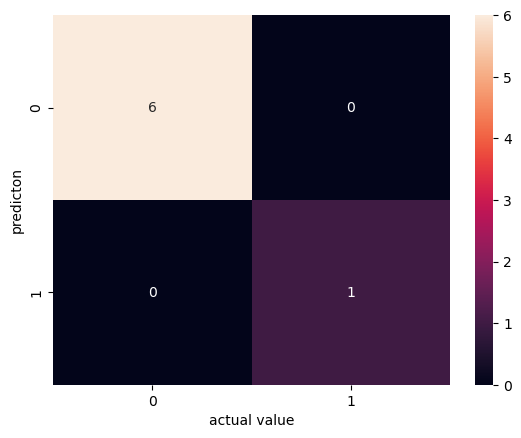

In [43]:
sns.heatmap(cm,annot=True)
plt.xlabel('actual value')
plt.ylabel('predicton')

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         1

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



In [56]:
#EXAMPLE-2

In [110]:
import pandas as pd
from  sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import accuracy_score

In [112]:
data=pd.read_csv('HR_comma_sep.csv')
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [114]:
data['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [116]:
data['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [118]:
le=LabelEncoder()
data['Department']=le.fit_transform(data['Department'])
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,low
1,0.80,0.86,5,262,6,0,1,0,7,medium
2,0.11,0.88,7,272,4,0,1,0,7,medium
3,0.72,0.87,5,223,5,0,1,0,7,low
4,0.37,0.52,2,159,3,0,1,0,7,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,low
14995,0.37,0.48,2,160,3,0,1,0,8,low
14996,0.37,0.53,2,143,3,0,1,0,8,low
14997,0.11,0.96,6,280,4,0,1,0,8,low


In [120]:
data['salary']=data['salary'].map({'low':0,'medium':1,'high':2})

In [122]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,0
1,0.80,0.86,5,262,6,0,1,0,7,1
2,0.11,0.88,7,272,4,0,1,0,7,1
3,0.72,0.87,5,223,5,0,1,0,7,0
4,0.37,0.52,2,159,3,0,1,0,7,0
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,0
14995,0.37,0.48,2,160,3,0,1,0,8,0
14996,0.37,0.53,2,143,3,0,1,0,8,0
14997,0.11,0.96,6,280,4,0,1,0,8,0


In [124]:
x=data.drop('left',axis=1)
y=data['left']

In [126]:
x

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,0,7,0
1,0.80,0.86,5,262,6,0,0,7,1
2,0.11,0.88,7,272,4,0,0,7,1
3,0.72,0.87,5,223,5,0,0,7,0
4,0.37,0.52,2,159,3,0,0,7,0
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,8,0
14995,0.37,0.48,2,160,3,0,0,8,0
14996,0.37,0.53,2,143,3,0,0,8,0
14997,0.11,0.96,6,280,4,0,0,8,0


In [128]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [137]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=25)

In [139]:
model1=LogisticRegression()

In [141]:
model1.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [146]:
model1.coef_

array([[-4.10418395,  0.56215771, -0.30487601,  0.00461768,  0.26161614,
        -1.5478011 , -0.79157199,  0.02564733, -0.70868146]])

In [150]:
model1.intercept_

array([0.3605899])

In [154]:
y_pred=model1.predict(x_test)

In [156]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [160]:
predtable=pd.DataFrame({'true y values':y_test,'predicted y values':y_pred})
predtable

,true y values,predicted y values
4505,0,0
7638,0,0
14075,0,0
6137,0,0
539,1,0
...,...,...
9426,0,0
5323,0,0
11546,0,1
5102,0,0


In [162]:
model1.score(x_train,y_train)

0.7958853224116582

In [164]:
model1.score(x_test,y_test)

0.7853333333333333

In [166]:
from sklearn.metrics import confusion_matrix,classification_report

In [168]:
import seaborn as sns

In [170]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[3158,  254],
       [ 712,  376]], dtype=int64)

Text(50.722222222222214, 0.5, 'predicton')

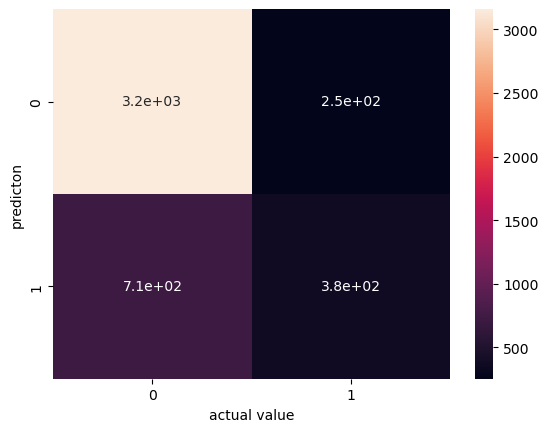

In [172]:
sns.heatmap(cm,annot=True)
plt.xlabel('actual value')
plt.ylabel('predicton')

In [174]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3412
           1       0.60      0.35      0.44      1088

    accuracy                           0.79      4500
   macro avg       0.71      0.64      0.65      4500
weighted avg       0.76      0.79      0.76      4500

